# Affordable Housing in Chicago

## Import affordable housing data set

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Affordable_Rental_Housing_Developments.csv to Affordable_Rental_Housing_Developments.csv


In [0]:
import pandas as pd

In [0]:
import io
ah_data = pd.read_csv(io.BytesIO(uploaded['Affordable_Rental_Housing_Developments.csv']))

In [0]:
ah1_data = ah_data[['Property Name', 'Community Area Number','Community Area Name', 'Units', 'Latitude', 'Longitude']]

In [0]:
ah2_data = ah1_data.groupby('Community Area Name', axis = 0)['Units'].sum()

In [0]:
ah2_data = pd.DataFrame(ah2_data)

In [9]:
ah2_data.head()

,Units
Community Area Name,
Albany Park,233
Ashburn,85
Auburn Gresham,406
Austin,634
Avalon Park,102


## Visually representing the affordable property areas in Chicago

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt

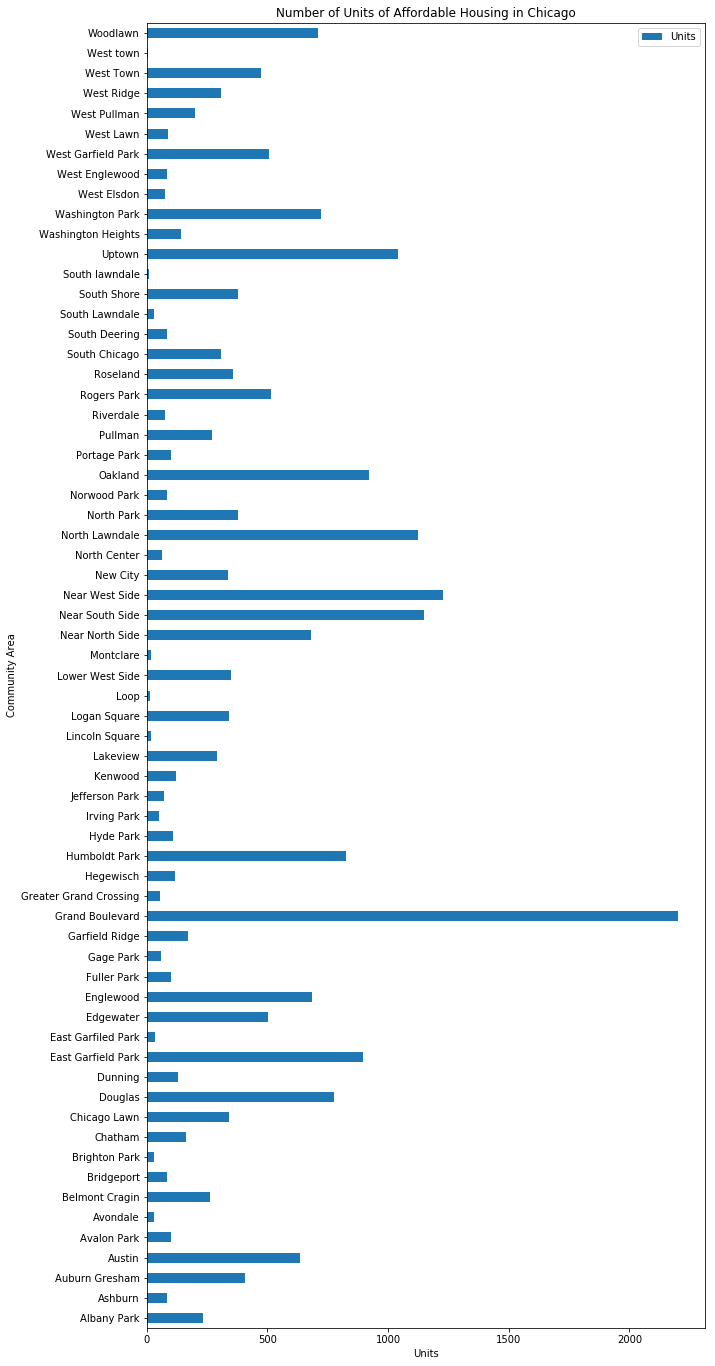

In [11]:
ah2_data.plot(kind='barh', figsize=(10, 24))

plt.xlabel('Units') # add to x-label to the plot
plt.ylabel('Community Area') # add y-label to the plot
plt.title('Number of Units of Affordable Housing in Chicago') # add title to the plot

plt.show()

## Import Libraries for Identifying Common Venues

In [13]:
#Importing additional libraries
import json # library to handle JSON files

!pip install geopy # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import numpy as np

print('Libraries imported once more.')

Libraries imported once more.


## Identifying the locations of property developments in Chicago

In [14]:
#Verifying the location of Toronto
address = 'Chicago, IL'

geolocator = Nominatim(user_agent="chicago_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago, IL are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chicago, IL are 41.8755616, -87.6244212.


In [15]:
# create map of New York using latitude and longitude values
map_chicago = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, ca, prop in zip(ah1_data['Latitude'], ah1_data['Longitude'], ah1_data['Community Area Name'], ah1_data['Property Name']):
    label = '{}, {}'.format(ca, prop)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)  
    
map_chicago

## Identifying the top venues closest to each property area

In [16]:
#Keying in Foursquare credentials

CLIENT_ID = 'S43J1JTKI4XWL1NDXPSB04GWSY5JDROOO0NCMCSF5N05WBTN' # your Foursquare ID
CLIENT_SECRET = 'HGTH4UW1OXVWWB4AH5QPF2ZVXUKXQW4XIY4UTDCLJJKY1ZB3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: S43J1JTKI4XWL1NDXPSB04GWSY5JDROOO0NCMCSF5N05WBTN
CLIENT_SECRET:HGTH4UW1OXVWWB4AH5QPF2ZVXUKXQW4XIY4UTDCLJJKY1ZB3


In [0]:
#Creating the dataset for Grand Boulevard from the original Chicago dataset

gb_data = ah1_data[ah1_data['Community Area Name'] == 'Grand Boulevard'].reset_index(drop=True)

In [0]:
gb1_data = gb_data[['Property Name', 'Units']]

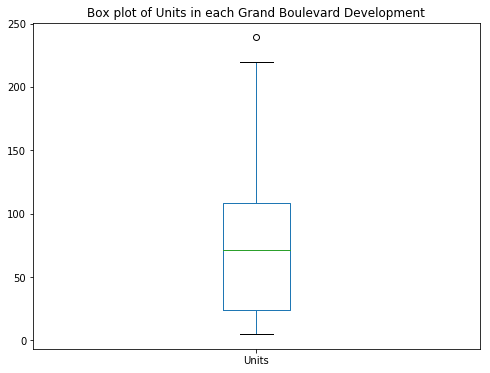

In [19]:
#Creating a box plot

gb1_data.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Units in each Grand Boulevard Development')

plt.show()

In [21]:
#Showing the statistics for the Grand Boulevard properties

gb1_data.describe()

,Units
count,27.000000
mean,81.518519
std,63.778083
min,5.000000
25%,24.000000
50%,71.000000
75%,108.500000
max,239.000000


In [0]:
#Selecting only properties above the 1st interquartile range

gb2_data = gb_data[gb_data['Units']>=24].reset_index()

In [23]:
gb2_data.drop(['index'], axis=1)

,Property Name,Community Area Number,Community Area Name,Units,Latitude,Longitude
0,Geneva Gables,38,Grand Boulevard,65,41.814061,-87.623112
1,Indiana Manor Town Homes,38,Grand Boulevard,87,41.813971,-87.621192
2,Cornerstone Apts.,38,Grand Boulevard,24,41.803042,-87.607589
3,Legends South - Savoy Square,38,Grand Boulevard,220,41.813195,-87.626337
4,Evans Langley,38,Grand Boulevard,60,41.803040,-87.607755
5,Bronzeville Senior Apts.,38,Grand Boulevard,97,41.820382,-87.614382
6,Hearts United II-The Quincy (scattered sites),38,Grand Boulevard,81,41.816666,-87.609060
7,Progressive Square,38,Grand Boulevard,107,41.807699,-87.624560
8,Legends South - Coleman Place,38,Grand Boulevard,118,41.820075,-87.620423
9,Hearts United I-The Langston (scattered sites),38,Grand Boulevard,116,41.819576,-87.608483


In [24]:
#Obtaining the latitude and longitude of the chosen property, Rosenwald Courts for temporary analysis
prop_latitude = gb2_data.loc[16, 'Latitude'] # property latitude value
prop_longitude = gb2_data.loc[16, 'Longitude'] # property longitude value

prop_name = gb2_data.loc[16, 'Property Name'] # property name

print('Latitude and longitude values of {} are {}, {}.'.format(prop_name, 
                                                               prop_latitude, 
                                                               prop_longitude))

Latitude and longitude values of Rosenwald Courts Apts. are 41.809825649000004, -87.62299937680001.


In [25]:
#Obtaining the Foursquare URl for places of interest near Rosenwald

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    prop_latitude, 
    prop_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=S43J1JTKI4XWL1NDXPSB04GWSY5JDROOO0NCMCSF5N05WBTN&client_secret=HGTH4UW1OXVWWB4AH5QPF2ZVXUKXQW4XIY4UTDCLJJKY1ZB3&v=20180605&ll=41.809825649000004,-87.62299937680001&radius=500&limit=100'

In [0]:
rosenwald_results = requests.get(url).json()

In [0]:
#Create a function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [28]:
#Creating a dataframe showing the venues close and in Rosenwald

venues = rosenwald_results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Abundance Bakery,Bakery,41.809305,-87.622465
1,Blues Brothers Mural / Shelly's Loan & Jewelry...,Plaza,41.809391,-87.619517
2,Peach's Restaurant,Breakfast Spot,41.809481,-87.617009
3,200 Liquors,Liquor Store,41.809553,-87.620876
4,Harold's Chicken,Fried Chicken Joint,41.809297,-87.622343


In [0]:
#Create a function to repeat the same for all neighborhoods

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Property Name', 
                  'Property Latitude', 
                  'Property Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [30]:
gb_venues = getNearbyVenues(names=gb2_data['Property Name'],
                                   latitudes=gb2_data['Latitude'],
                                   longitudes=gb2_data['Longitude']
                                  )

Geneva Gables
Indiana Manor Town Homes
Cornerstone Apts.
Legends South - Savoy Square
Evans Langley
Bronzeville Senior Apts.
Hearts United II-The Quincy (scattered sites)
Progressive Square
Legends South - Coleman Place
Hearts United I-The Langston (scattered sites)
Shops & Lofts at 47
Paul G. Stewart Phase III Tower
Park Boulevard Tower/Grand Renaissance Apts.
Margaret Ford Manor Independent Living
Legends South - Hansberry Square
Hearts United III-The Leontyne (scattered sites)
Rosenwald Courts Apts.
Bronzeville Family Apts.
Washington Park SRO
Legends South - Mahalia Place
Legends South - Gwendolyn Place


In [31]:
#Check the size of the resulting dataframe

print(gb_venues.shape)
gb_venues.head()

(237, 7)


,Property Name,Property Latitude,Property Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Geneva Gables,41.814061,-87.623112,Alice's,41.816453,-87.623775,BBQ Joint
1,Geneva Gables,41.814061,-87.623112,Bronzeville Pizzeria & Grille,41.816615,-87.623032,Fast Food Restaurant
2,Geneva Gables,41.814061,-87.623112,J&J Fish & Chicken,41.816490,-87.620921,Restaurant
3,Geneva Gables,41.814061,-87.623112,Windy City Cigar Lounge,41.816172,-87.620029,Smoke Shop
4,Geneva Gables,41.814061,-87.623112,The Game,41.816226,-87.620010,Sports Bar


In [32]:
#Number of venues returned by each property

gb_venues.groupby('Property Name').count()

,Property Latitude,Property Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Property Name,,,,,,
Bronzeville Family Apts.,15,15,15,15,15,15
Bronzeville Senior Apts.,12,12,12,12,12,12
Cornerstone Apts.,11,11,11,11,11,11
Evans Langley,11,11,11,11,11,11
Geneva Gables,8,8,8,8,8,8
Hearts United I-The Langston (scattered sites),14,14,14,14,14,14
Hearts United II-The Quincy (scattered sites),23,23,23,23,23,23
Hearts United III-The Leontyne (scattered sites),24,24,24,24,24,24
Indiana Manor Town Homes,11,11,11,11,11,11


In [33]:
# one hot encoding
gb_onehot = pd.get_dummies(gb_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
gb_onehot['Property Name'] = gb_venues['Property Name'] 

# move neighborhood column to the first column
fixed_columns = [gb_onehot.columns[-1]] + list(gb_onehot.columns[:-1])
gb_onehot = gb_onehot[fixed_columns]

gb_onehot.head()

,Property Name,American Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Baseball Field,Bed & Breakfast,Bike Rental / Bike Share,Bookstore,Boutique,Breakfast Spot,Burger Joint,Bus Station,Business Service,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cosmetics Shop,Deli / Bodega,Discount Store,Fast Food Restaurant,Flower Shop,Food,Food Truck,Fountain,Fried Chicken Joint,Gas Station,Grocery Store,Gym,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hotel,Intersection,Italian Restaurant,Juice Bar,Light Rail Station,Liquor Store,Mexican Restaurant,Motel,Museum,Music Venue,Park,Performing Arts Venue,Pharmacy,Playground,Plaza,Rest Area,Restaurant,Sandwich Place,Seafood Restaurant,Smoke Shop,Southern / Soul Food Restaurant,Spa,Sports Bar,Stadium,Sushi Restaurant,Train Station,Vineyard
0,Geneva Gables,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Geneva Gables,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Geneva Gables,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Geneva Gables,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Geneva Gables,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [34]:
#Examining the shape of the dataframe
gb_onehot.shape

(237, 64)

In [35]:
#See the mean frequency of each category
gb_grouped = gb_onehot.groupby('Property Name').mean().reset_index()
gb_grouped

,Property Name,American Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Baseball Field,Bed & Breakfast,Bike Rental / Bike Share,Bookstore,Boutique,Breakfast Spot,Burger Joint,Bus Station,Business Service,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cosmetics Shop,Deli / Bodega,Discount Store,Fast Food Restaurant,Flower Shop,Food,Food Truck,Fountain,Fried Chicken Joint,Gas Station,Grocery Store,Gym,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hotel,Intersection,Italian Restaurant,Juice Bar,Light Rail Station,Liquor Store,Mexican Restaurant,Motel,Museum,Music Venue,Park,Performing Arts Venue,Pharmacy,Playground,Plaza,Rest Area,Restaurant,Sandwich Place,Seafood Restaurant,Smoke Shop,Southern / Soul Food Restaurant,Spa,Sports Bar,Stadium,Sushi Restaurant,Train Station,Vineyard
0,Bronzeville Family Apts.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.133333,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.133333,0.00,0.066667,0.000000,0.000000,0.066667,0.000000,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.066667,0.133333,0.000000
1,Bronzeville Senior Apts.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.166667,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.166667,0.00,0.000000,0.000000,0.000000,0.083333,0.000000,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000
2,Cornerstone Apts.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.00,0.000000,0.090909,0.090909,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.090909,0.000000,0.000000,0.000000,0.000000,0.090909,0.090909,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000
3,Evans Langley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.00,0.000000,0.090909,0.090909,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.090909,0.000000,0.000000,0.000000,0.000000,0.090909,0.090909,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000
4,Geneva Gables,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.00,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.125000,0.000000,0.000000,0.125000,0.000000,0.000000,0.125000,0.000000
5,Hearts United I-The Langston (scattered sites),0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [36]:
#Print each neighborhood along with the top 5 venues

num_top_venues = 5

for hood in gb_grouped['Property Name']:
    print("----"+hood+"----")
    temp = gb_grouped[gb_grouped['Property Name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bronzeville Family Apts.----
                      venue  freq
0             Train Station  0.13
1               Coffee Shop  0.13
2             Grocery Store  0.13
3            Clothing Store  0.07
4  Bike Rental / Bike Share  0.07


----Bronzeville Senior Apts.----
                             venue  freq
0                    Grocery Store  0.17
1                             Park  0.17
2                      Coffee Shop  0.17
3                   Clothing Store  0.08
4  Southern / Soul Food Restaurant  0.08


----Cornerstone Apts.----
                venue  freq
0       Historic Site  0.09
1      Sandwich Place  0.09
2            Pharmacy  0.09
3  Chinese Restaurant  0.09
4         Bus Station  0.09


----Evans Langley----
                venue  freq
0       Historic Site  0.09
1      Sandwich Place  0.09
2            Pharmacy  0.09
3  Chinese Restaurant  0.09
4         Bus Station  0.09


----Geneva Gables----
                      venue  freq
0                Smoke Shop  0.12
1 

In [0]:
#Create a function that passes the above data into a pandas dataframe

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
#Display the top 5 types of venue of each property

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Property Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
prop_venues_sorted = pd.DataFrame(columns=columns)
prop_venues_sorted['Property Name'] = gb_grouped['Property Name']

for ind in np.arange(gb_grouped.shape[0]):
    prop_venues_sorted.iloc[ind, 1:] = return_most_common_venues(gb_grouped.iloc[ind, :], num_top_venues)

prop_venues_sorted.head()

,Property Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bronzeville Family Apts.,Grocery Store,Train Station,Coffee Shop,Clothing Store,Sushi Restaurant
1,Bronzeville Senior Apts.,Park,Grocery Store,Coffee Shop,Gas Station,Discount Store
2,Cornerstone Apts.,Baseball Field,Cosmetics Shop,Bus Station,Stadium,Fountain
3,Evans Langley,Baseball Field,Cosmetics Shop,Bus Station,Stadium,Fountain
4,Geneva Gables,Restaurant,Train Station,Sports Bar,BBQ Joint,Smoke Shop


## Clustering the property areas in Grand Boulevard

In [39]:
#Run k-means to cluster the properties into 5 clusters

# set number of clusters
kclusters = 5

gb_grouped_clustering = gb_grouped.drop('Property Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(gb_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 3, 3, 2, 0, 0, 0, 2, 4], dtype=int32)

In [40]:
# add clustering labels

prop_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

gb_merged = gb2_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
gb_merged = gb_merged.join(prop_venues_sorted.set_index('Property Name'), on='Property Name')

gb_merged.head() # check the last columns!

,index,Property Name,Community Area Number,Community Area Name,Units,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0,Geneva Gables,38,Grand Boulevard,65,41.814061,-87.623112,2,Restaurant,Train Station,Sports Bar,BBQ Joint,Smoke Shop
1,1,Indiana Manor Town Homes,38,Grand Boulevard,87,41.813971,-87.621192,2,Restaurant,Art Gallery,Sports Bar,Train Station,BBQ Joint
2,2,Cornerstone Apts.,38,Grand Boulevard,24,41.803042,-87.607589,3,Baseball Field,Cosmetics Shop,Bus Station,Stadium,Fountain
3,4,Legends South - Savoy Square,38,Grand Boulevard,220,41.813195,-87.626337,1,Park,BBQ Joint,Fast Food Restaurant,Café,Fried Chicken Joint
4,7,Evans Langley,38,Grand Boulevard,60,41.803040,-87.607755,3,Baseball Field,Cosmetics Shop,Bus Station,Stadium,Fountain


In [41]:
#Visualising the Clusters

# create map
map_clusters = folium.Map(location=[41.8131, -87.6178], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(gb_merged['Latitude'], gb_merged['Longitude'], gb_merged['Property Name'], gb_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Results

### Cluster 0

In [42]:
gb_merged.loc[gb_merged['Cluster Labels'] == 0, gb_merged.columns[[1] + list(range(5, gb_merged.shape[1]))]]

,Property Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
5,Bronzeville Senior Apts.,41.820382,-87.614382,0,Park,Grocery Store,Coffee Shop,Gas Station,Discount Store
6,Hearts United II-The Quincy (scattered sites),41.816666,-87.609060,0,Coffee Shop,Park,BBQ Joint,Bookstore,Playground
9,Hearts United I-The Langston (scattered sites),41.819576,-87.608483,0,Coffee Shop,Park,Vineyard,Boutique,History Museum
11,Paul G. Stewart Phase III Tower,41.819229,-87.616452,0,Coffee Shop,Restaurant,History Museum,Clothing Store,Sports Bar
12,Park Boulevard Tower/Grand Renaissance Apts.,41.816750,-87.616649,0,Coffee Shop,Clothing Store,Art Gallery,Grocery Store,Sports Bar
15,Hearts United III-The Leontyne (scattered sites),41.816602,-87.610556,0,Coffee Shop,Park,BBQ Joint,Boutique,Clothing Store
17,Bronzeville Family Apts.,41.820350,-87.616514,0,Grocery Store,Train Station,Coffee Shop,Clothing Store,Sushi Restaurant


### Cluster 1

In [43]:
gb_merged.loc[gb_merged['Cluster Labels'] == 1, gb_merged.columns[[1] + list(range(5, gb_merged.shape[1]))]]

,Property Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,Legends South - Savoy Square,41.813195,-87.626337,1,Park,BBQ Joint,Fast Food Restaurant,Café,Fried Chicken Joint
7,Progressive Square,41.807699,-87.624560,1,Park,Train Station,Fried Chicken Joint,Liquor Store,Bakery
13,Margaret Ford Manor Independent Living,41.812980,-87.624707,1,Park,BBQ Joint,Fast Food Restaurant,Liquor Store,Bakery
16,Rosenwald Courts Apts.,41.809826,-87.622999,1,American Restaurant,Plaza,Train Station,Liquor Store,Fried Chicken Joint


### Cluster 2

In [44]:
gb_merged.loc[gb_merged['Cluster Labels'] == 2, gb_merged.columns[[1] + list(range(5, gb_merged.shape[1]))]]

,Property Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Geneva Gables,41.814061,-87.623112,2,Restaurant,Train Station,Sports Bar,BBQ Joint,Smoke Shop
1,Indiana Manor Town Homes,41.813971,-87.621192,2,Restaurant,Art Gallery,Sports Bar,Train Station,BBQ Joint
18,Washington Park SRO,41.803755,-87.621217,2,Restaurant,Sandwich Place,Chinese Restaurant,Convenience Store,Fast Food Restaurant
19,Legends South - Mahalia Place,41.816663,-87.622265,2,Gym,Performing Arts Venue,BBQ Joint,Boutique,Discount Store
20,Legends South - Gwendolyn Place,41.815550,-87.622857,2,Food Truck,Smoke Shop,Park,Bike Rental / Bike Share,Bed & Breakfast


### Cluster 3

In [45]:
gb_merged.loc[gb_merged['Cluster Labels'] == 3, gb_merged.columns[[1] + list(range(5, gb_merged.shape[1]))]]

,Property Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Cornerstone Apts.,41.803042,-87.607589,3,Baseball Field,Cosmetics Shop,Bus Station,Stadium,Fountain
4,Evans Langley,41.803040,-87.607755,3,Baseball Field,Cosmetics Shop,Bus Station,Stadium,Fountain
10,Shops & Lofts at 47,41.809414,-87.607086,3,Fast Food Restaurant,Convenience Store,Cosmetics Shop,Discount Store,Seafood Restaurant


### Cluster 4

In [46]:
gb_merged.loc[gb_merged['Cluster Labels'] == 4, gb_merged.columns[[1] + list(range(5, gb_merged.shape[1]))]]

,Property Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
8,Legends South - Coleman Place,41.820075,-87.620423,4,Southern / Soul Food Restaurant,Flower Shop,BBQ Joint,Convenience Store,Motel
14,Legends South - Hansberry Square,41.820911,-87.626526,4,Motel,Intersection,Train Station,Flower Shop,Southern / Soul Food Restaurant
